In [36]:
import torch
import pandas as pd
import numpy as np

In [37]:
train_df = pd.read_csv("training.csv")
train_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [38]:
conds = np.where((train_df.isnull().sum(axis=0) < 100))
train_df = train_df.iloc[:, conds[0]]
train_df = train_df.dropna(axis=0)
train_df.isnull().sum(axis=0)
a = np.array(list(train_df['Image'].iloc[2453].split(' '))).reshape(-1, 96, 96).astype(np.float)
print(a)

[[[141. 141. 141. ... 134. 139. 142.]
  [141. 141. 141. ... 132. 137. 140.]
  [141. 141. 141. ... 128. 134. 137.]
  ...
  [146. 146. 145. ... 112.  92.  81.]
  [145. 145. 144. ... 107.  87.  76.]
  [144. 144. 144. ... 104.  84.  73.]]]


/tmp/ipykernel_27457/4175288762.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.array(list(train_df['Image'].iloc[2453].split(' '))).reshape(-1, 96, 96).astype(np.float)


In [39]:
from datset import FacesDataset
from torch.utils.data import DataLoader

traindataset = FacesDataset(train_df.iloc[:32])
traindataloader = DataLoader(traindataset, 32, shuffle=True)
images, labels = next(iter(traindataloader))

tensor([66.8504, 35.6370, 32.5281, 36.5246, 49.6889, 58.1244, 49.6889, 80.6115],
       dtype=torch.float64)


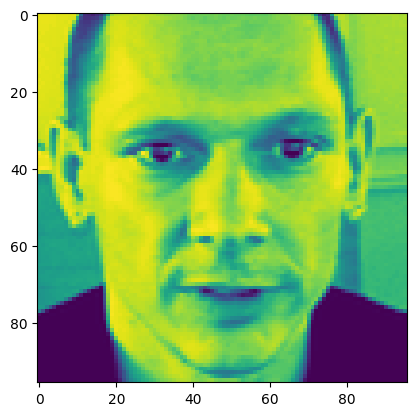

In [40]:
import matplotlib.pyplot as plt

plt.imshow(images[0].reshape(96,96))
print(labels[0])
#plt.scatter(labels[:,0])

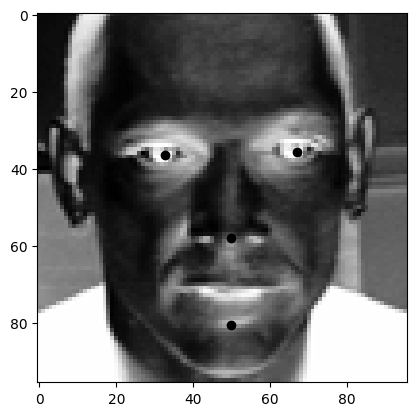

In [41]:
def show_datapoint(image, label):
    l = label.reshape(4, 2)
    X = l[:, 0]
    Y = l[:, 1]
    plt.imshow(image.reshape(96,96), cmap='Greys')
    plt.scatter(X, Y, c='black')

show_datapoint(images[0], labels[0])

In [42]:
from torchvision.models import resnet18

In [43]:
model = resnet18()
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [44]:
from torch import nn

In [45]:
model.fc = nn.Linear(in_features=512, out_features=8, bias=True)
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [46]:
traindataloader

In [47]:
model(images[0].float().reshape(1,1,96,96))

tensor([[ 1.3036,  0.8583, -0.3920,  0.0755,  0.6794,  0.1637, -0.1215,  0.7282]],
       grad_fn=<AddmmBackward0>)

In [48]:
criterion = nn.CrossEntropyLoss()
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [49]:
images, labels = next(iter(traindataloader))

In [50]:
print(images)

tensor([[[[223., 225., 212.,  ..., 177., 181., 182.],
          [225., 222., 197.,  ..., 176., 180., 182.],
          [225., 216., 183.,  ..., 177., 181., 181.],
          ...,
          [ 77.,  60.,  48.,  ...,  19.,  14.,  14.],
          [ 36.,  38.,  33.,  ...,  14.,  13.,  13.],
          [ 32.,  27.,  21.,  ...,  15.,  12.,   9.]]],


        [[[193., 192., 193.,  ..., 199., 199., 202.],
          [193., 194., 193.,  ..., 199., 200., 202.],
          [194., 194., 194.,  ..., 198., 201., 200.],
          ...,
          [ 78.,  78.,  79.,  ...,   2.,   1.,   0.],
          [ 79.,  78.,  77.,  ...,   1.,   1.,   2.],
          [ 81.,  79.,  50.,  ...,   1.,   1.,   1.]]],


        [[[164., 158., 118.,  ..., 187., 187., 186.],
          [162., 138.,  90.,  ..., 187., 188., 186.],
          [154., 113.,  74.,  ..., 187., 187., 185.],
          ...,
          [ 15.,   7.,  12.,  ..., 108., 142., 139.],
          [ 15.,   9.,   6.,  ...,  96., 122., 152.],
          [ 15.,  11.,   7., 

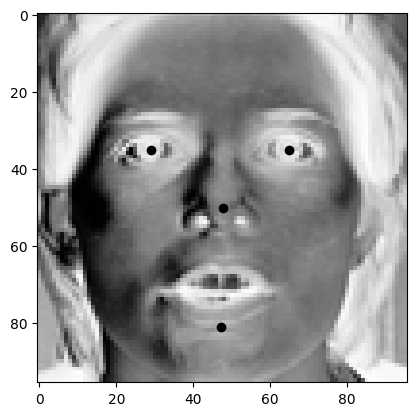

In [51]:
show_datapoint(images[0], labels[0])

In [52]:
for epoch in range(1000):
    running_loss = 0.0
    for image, label in traindataloader:

        print(label.shape)

        model.float()
        output = model(image.float())
        print(output.shape)
        loss = criterion(output, label.float())
        optimizer.step()
        optimizer.zero_grad()

        # print statistics
        running_loss += loss.item()
        #if i % 32 == 9:    # print every 2000 mini-batches
        print(f'[{epoch + 1}, {1:5d}] loss: {running_loss / 200:.5f}')
        running_loss = 0.0

torch.Size([32, 8])
torch.Size([32, 8])
[1,     1] loss: 4.36713
torch.Size([32, 8])
torch.Size([32, 8])
[2,     1] loss: 4.36713
torch.Size([32, 8])
torch.Size([32, 8])
[3,     1] loss: 4.36713
torch.Size([32, 8])
torch.Size([32, 8])
[4,     1] loss: 4.36713
torch.Size([32, 8])
torch.Size([32, 8])
[5,     1] loss: 4.36713
torch.Size([32, 8])
torch.Size([32, 8])
[6,     1] loss: 4.36713
torch.Size([32, 8])
torch.Size([32, 8])
[7,     1] loss: 4.36713
torch.Size([32, 8])
torch.Size([32, 8])
[8,     1] loss: 4.36713
torch.Size([32, 8])
torch.Size([32, 8])
[9,     1] loss: 4.36713
torch.Size([32, 8])
torch.Size([32, 8])
[10,     1] loss: 4.36713
torch.Size([32, 8])
torch.Size([32, 8])
[11,     1] loss: 4.36713
torch.Size([32, 8])
torch.Size([32, 8])
[12,     1] loss: 4.36713
torch.Size([32, 8])
torch.Size([32, 8])
[13,     1] loss: 4.36713
torch.Size([32, 8])
torch.Size([32, 8])
[14,     1] loss: 4.36713
torch.Size([32, 8])
torch.Size([32, 8])
[15,     1] loss: 4.36713
torch.Size([32, 8])

KeyboardInterrupt: 